All Rows and Columns of the AirPassengers Dataset:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
1951-01-01         145
1951-02-01         150
1951-03-01         178
1951-04-01         163
1951-05-01         172
1951-06-01         178
1951-07-01         199
1951-08-01         199
1951-09-01         184
1951-10-01         162
1951-11-01         146
1951-12-01         166
1952-01-01         171
1952-02-01         180
1952-03-01         193
1952-0

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Temp\ipykernel_3420\2136206151.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SES_Forecast'] = fit_ses.forecast(len(test))
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(date

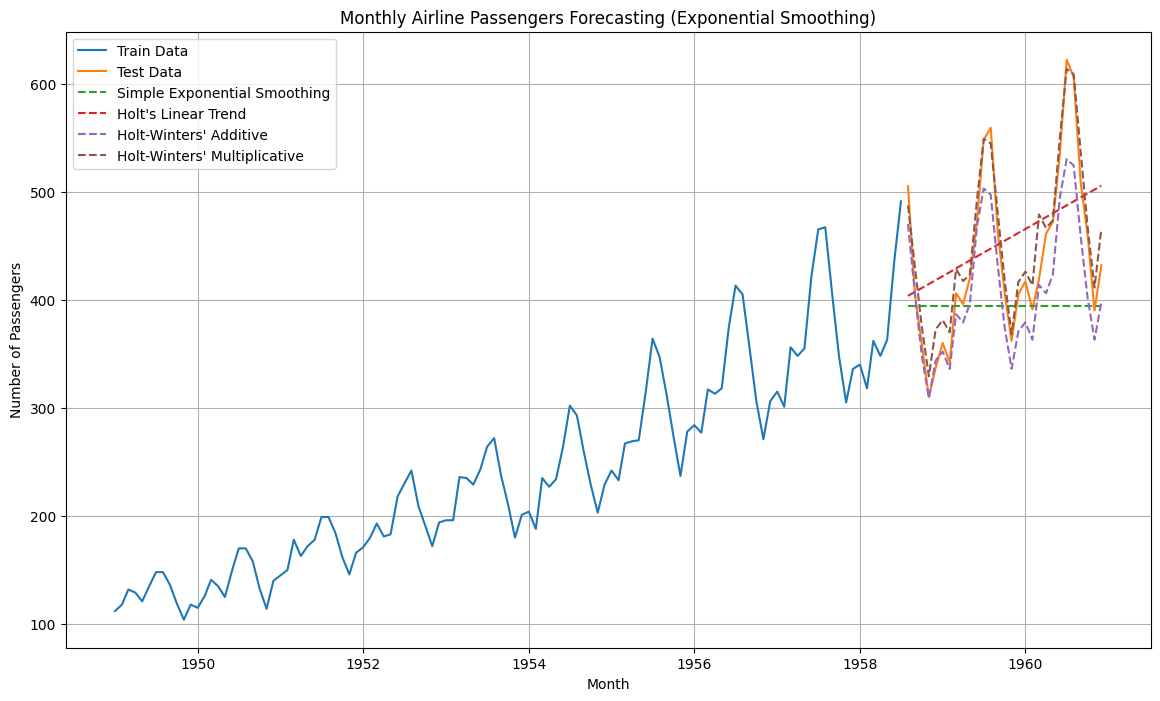


Test Set with Exponential Smoothing Forecasts:
            Passengers  SES_Forecast  Holt_Forecast  HW_Additive_Forecast  \
Month                                                                       
1958-08-01         505    394.305792     403.576547            470.040699   
1958-09-01         404    394.305792     407.216915            404.413016   
1958-10-01         359    394.305792     410.857283            348.118683   
1958-11-01         310    394.305792     414.497650            308.938595   
1958-12-01         337    394.305792     418.138018            343.703713   
1959-01-01         360    394.305792     421.778386            352.064594   
1959-02-01         342    394.305792     425.418753            336.005395   
1959-03-01         406    394.305792     429.059121            386.623430   
1959-04-01         396    394.305792     432.699489            378.927491   
1959-05-01         420    394.305792     436.339856            396.236026   
1959-06-01         472    39

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Load the Monthly Airline Passenger Data
file_path = 'C:/Users/USER/Downloads/AirPassengers.csv'
try:
    df = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')
    df.rename(columns={'#Passengers': 'Passengers'}, inplace=True)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the AirPassengers dataset is in your Downloads folder.")
    exit()

# Enable showing all rows and columns (optional)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("All Rows and Columns of the AirPassengers Dataset:")
print(df)

# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# 1. Simple Exponential Smoothing (SES)
fit_ses = SimpleExpSmoothing(train['Passengers']).fit(smoothing_level=0.2, optimized=False)
test['SES_Forecast'] = fit_ses.forecast(len(test))

# 2. Holt's Linear Trend Method (Double Exponential Smoothing)
fit_holt = Holt(train['Passengers']).fit(smoothing_level=0.2, smoothing_trend=0.1, optimized=False)
test['Holt_Forecast'] = fit_holt.forecast(len(test))

# 3. Holt-Winters' Additive Method (Triple Exponential Smoothing - Additive Seasonality)
fit_hw_add = ExponentialSmoothing(train['Passengers'],
                                 seasonal_periods=12,
                                 trend='add',
                                 seasonal='add').fit(optimized=True)
test['HW_Additive_Forecast'] = fit_hw_add.forecast(len(test))

# 4. Holt-Winters' Multiplicative Method (Triple Exponential Smoothing - Multiplicative Seasonality)
fit_hw_mult = ExponentialSmoothing(train['Passengers'],
                                  seasonal_periods=12,
                                  trend='mul',
                                  seasonal='mul').fit(optimized=True)
test['HW_Multiplicative_Forecast'] = fit_hw_mult.forecast(len(test))

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(train.index, train['Passengers'], label='Train Data')
plt.plot(test.index, test['Passengers'], label='Test Data')
plt.plot(test.index, test['SES_Forecast'], label='Simple Exponential Smoothing', linestyle='--')
plt.plot(test.index, test['Holt_Forecast'], label="Holt's Linear Trend", linestyle='--')
plt.plot(test.index, test['HW_Additive_Forecast'], label="Holt-Winters' Additive", linestyle='--')
plt.plot(test.index, test['HW_Multiplicative_Forecast'], label="Holt-Winters' Multiplicative", linestyle='--')
plt.title('Monthly Airline Passengers Forecasting (Exponential Smoothing)')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

print("\nTest Set with Exponential Smoothing Forecasts:")
print(test)

print("\nRemember to complete the Excel part of the assignment and write your reflection comparing Excel, R, and Python for exponential smoothing.")